In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
train_data = np.genfromtxt('X_train.csv', delimiter=',')
train_label = np.genfromtxt('T_train.csv', delimiter=',')
test_data = np.genfromtxt('X_test.csv', delimiter=',')
test_label = np.genfromtxt('T_test.csv', delimiter=',')

In [9]:
train_data.shape, train_label.shape

((5000, 784), (5000,))

# PCA Principal Components Analysis

find a orthogonal projection $W$ has minimum MSE(mean square error)

$$ z = xW \\
MSE = ||x - zW^T||^2 = || x - xWW^T ||^2 \\
= \text{constant} - \text{constant}W^TSW, S = \frac{\sum_x (x - \bar{x})(x - \bar{x})^T}{N} $$

$W^TSW$ is covariance matrix, so we can $\max W^TSW$ and get minimum MSE

It become a Rayleigh quotient problem, find eigen vector with max eigen value.

In [15]:
def covariance(x, y):
    x1 = x - np.sum(x, axis = 1)[:,None]
    y1 = y - np.sum(y, axis = 1)[:,None]
    return np.matmul(x1, y1.T)/ x1.shape[1]

In [42]:
# parameter
dim = 2
S = covariance(train_data.T, train_data.T)
S.shape

(784, 784)

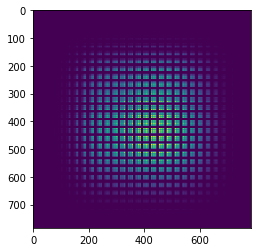

In [43]:
plt.imshow(S)

In [44]:
%%time
eigen_values, eigen_vectors = np.linalg.eig(S)

CPU times: user 3.11 s, sys: 2.9 s, total: 6.01 s
Wall time: 873 ms


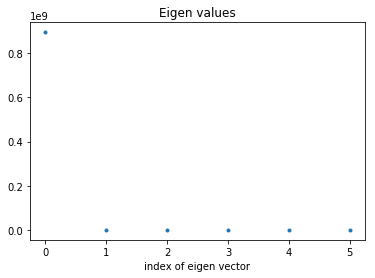

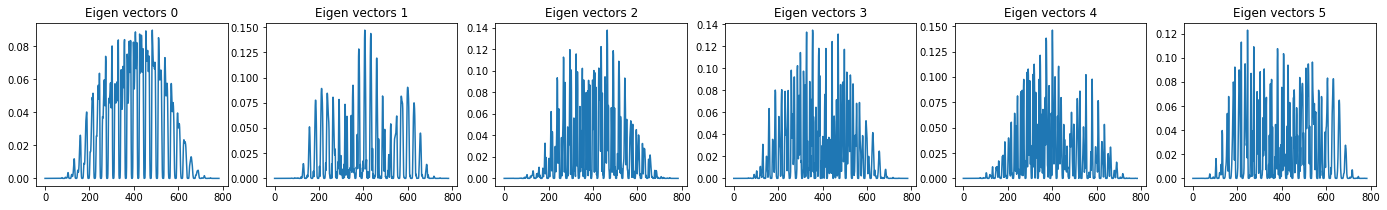

In [45]:
# show eigen vector with max eigen value

max_idxs = np.flip(np.argsort(np.abs(eigen_values)))

show_number = 6

plt.plot(np.abs(eigen_values[max_idxs[:show_number]]),'.')
plt.xticks(range(show_number), max_idxs[:show_number])
plt.title('Eigen values')
plt.xlabel('index of eigen vector')
plt.show()

plt.figure(figsize=(4*show_number,3))

for i in range(show_number):
    plt.subplot(1, show_number, i+1)
    plt.plot(np.abs(eigen_vectors[:,max_idxs[i]]))
    plt.title('Eigen vectors '+str(max_idxs[i]))

plt.show()

In [46]:
max_idxs = np.flip(np.argsort(np.abs(eigen_values)))
W = np.concatenate([np.abs(eigen_vectors[:, max_idxs[i]])[:,None] for i in range(dim)], axis=1)
W.shape    

(784, 2)

In [47]:
project = np.matmul(train_data, W)
project.shape

(5000, 2)

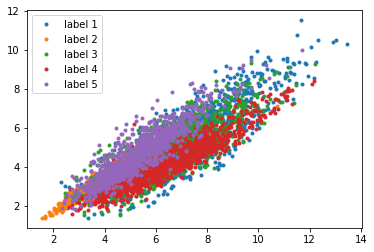

In [53]:
for t in range(1,6):
    mask = train_label == t
    plt.plot(project[mask,0], project[mask,1], '.', label='label '+str(t))
    
plt.legend()

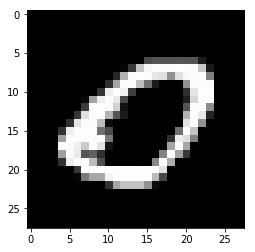

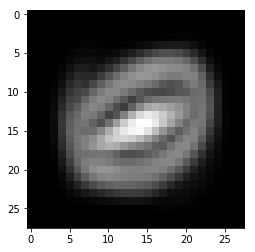

In [55]:
plt.imshow(train_data[0].reshape(28,28), cmap='gray')
plt.show()
plt.imshow(np.matmul(np.matmul(train_data[0],W), W.T).reshape(28,28), cmap='gray')